Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.



Tasks:
Data Cleaning and Preparation:

Load the dataset into a DataFrame or equivalent data structure.

Handle missing values appropriately (e.g., imputation, deletion).

Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

Detect and treat outliers if necessary.


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("/content/Cardiotocographic.csv")
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Total 2126 observation are there .
LB , AC, Ds,DP , MLTV,width,tendency,NSP have missing observation .

In [5]:
# Handle missing values appropriately
# For numerical columns, we can use mean or median imputation
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [6]:
# Detect and treat outliers if necessary
# Here we'll use a simple approach of removing outliers using z-score
from scipy import stats
z_scores = stats.zscore(data[numerical_cols])
print(z_scores)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = data[filtered_entries]
df.head()

            LB        AC         FM        UC        DL        DS        DP  \
0    -1.189842 -0.732909  -0.146533 -1.314683 -0.567147 -0.017643 -0.207542   
1    -0.119536  0.726378  -0.146533  0.595558  0.387339 -0.017643 -0.207542   
2    -0.030344  0.027035  -0.146533  1.172279  0.426977 -0.017643 -0.207542   
3     0.058849 -0.147139  -0.146533  1.003470  0.199131 -0.017643 -0.207542   
4    -0.124153  0.757276  -0.146533  1.123674 -0.567147 -0.017643 -0.207542   
...        ...       ...        ...       ...       ...       ...       ...   
2121  0.594002 -0.732909  14.089450  0.908809 -0.567147 -0.017643 -0.207542   
2122  0.594002 -0.555726  -0.146533  0.775114 -0.567147 -0.017643 -0.207542   
2123  0.594002 -0.508651  -0.146533  0.740230 -0.567147 -0.017643 -0.207542   
2124  0.594002 -0.577618  -0.146533  0.514830 -0.567147 -0.017643 -0.207542   
2125  0.772386 -0.363372  -0.149311  1.103978 -0.567147 -0.017643 -0.207542   

          ASTV      MSTV      ALTV      MLTV     Wi

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

Statistical Summary:

Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

Highlight any interesting findings from this summary.


In [7]:
df.describe()

LB           AC           FM           UC           DL  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean    133.303462     0.003178     0.004240     0.004391     0.001732   
std       9.899678     0.003770     0.013554     0.002904     0.002705   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001668     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002358     0.006579     0.003036   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
mean   1.186182e-08     0.000100    46.870868     1.283173     9.193894   
std    5.854019e-07     0.000404    16.834525     0.778099    16.574763   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    48.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  1869.000000  1869.000000  1869.000000  1869.000000  
mean      8.320356    68.895751     0.329048     1.241862  
std       5.227228    37.614211     0.601753     0.529159  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.500000    66.000000     0.000000     1.000000  
75%      10.900000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

In [8]:
median = df.median()
print(median)

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004556
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         48.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        66.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [9]:
# Calculate interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LB          15.000000
AC           0.005650
FM           0.002358
UC           0.004577
DL           0.003036
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.000000
Width       61.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


Data Visualization:
Create histograms or boxplots to visualize the distributions of various numerical variables.

Use bar charts or pie charts to display the frequency of categories for categorical variables.

Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


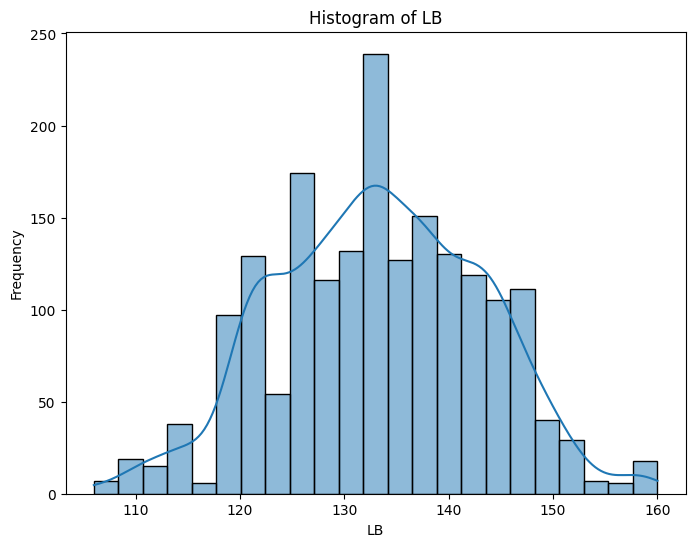

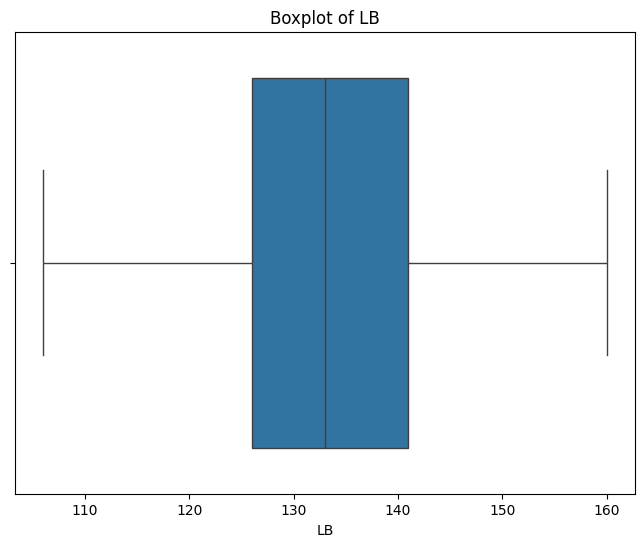

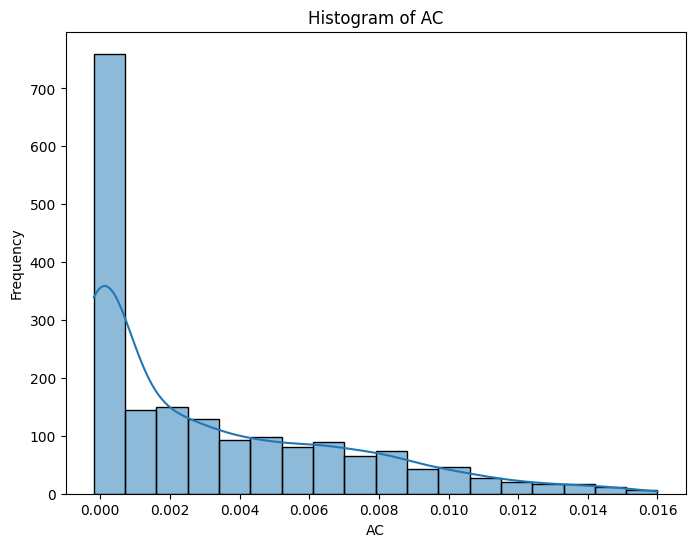

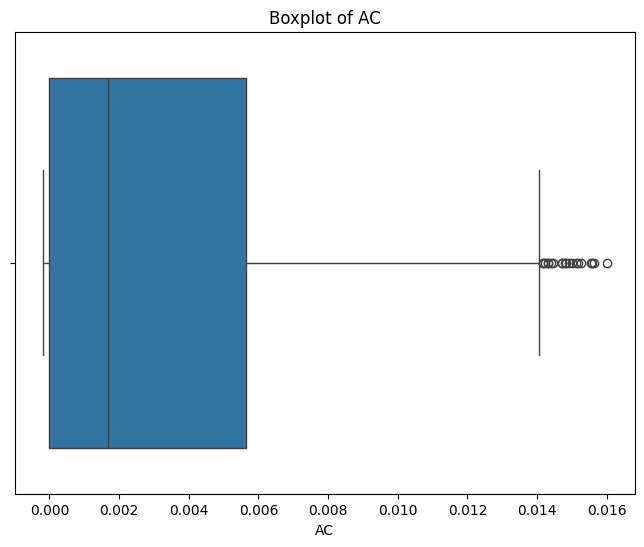

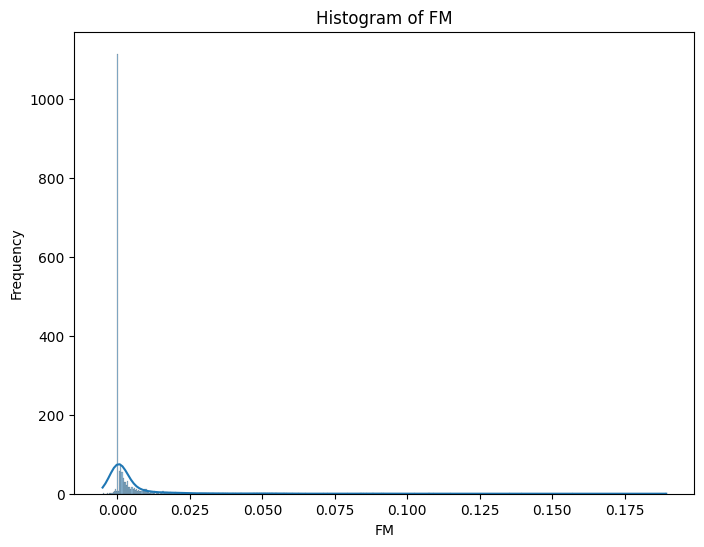

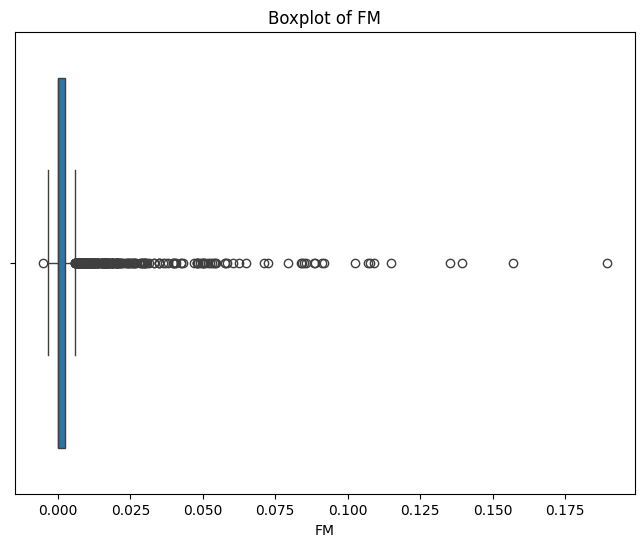

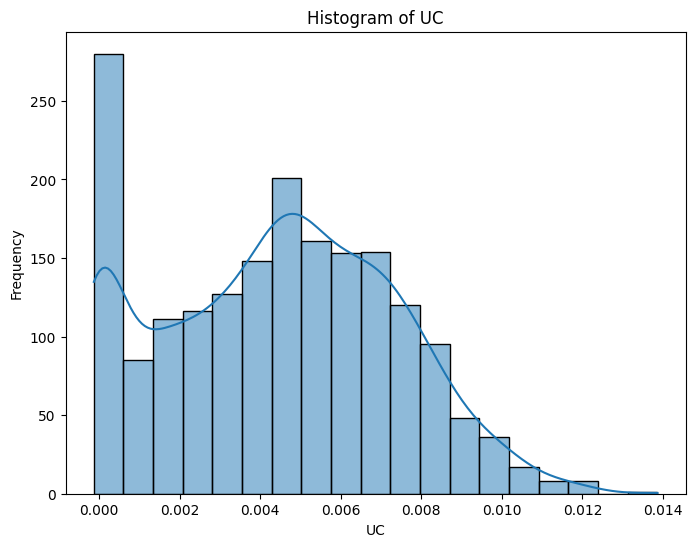

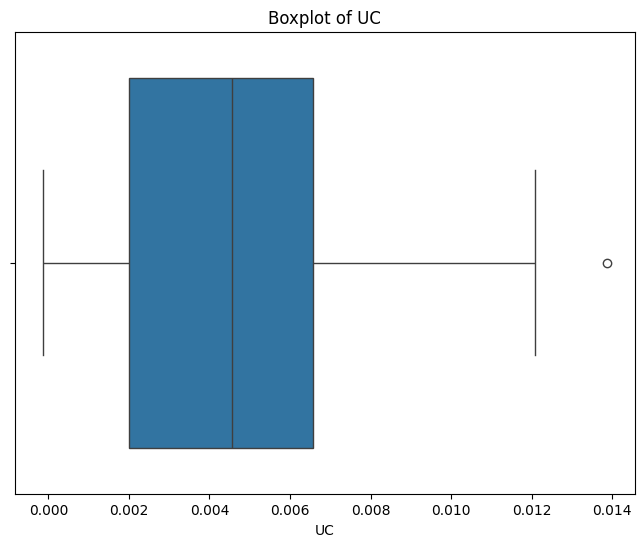

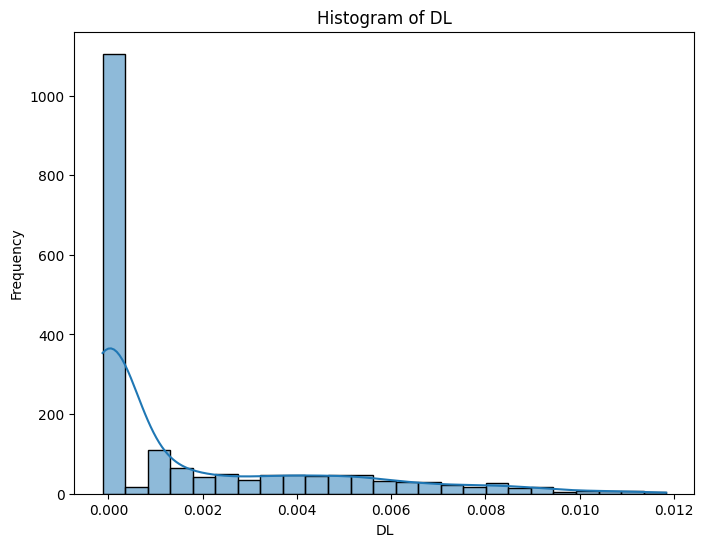

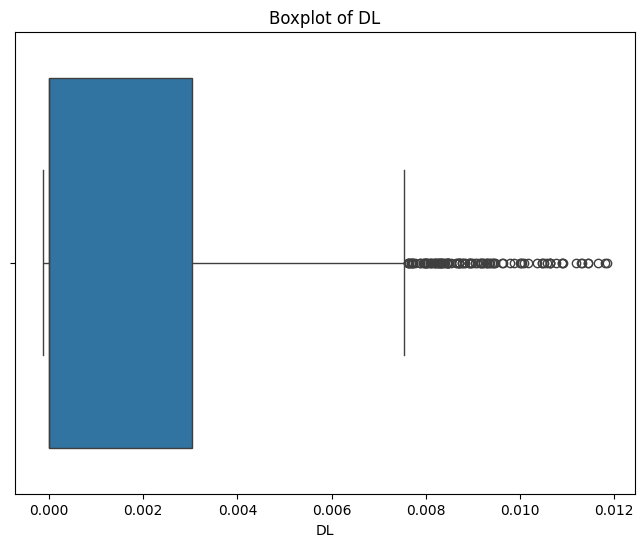

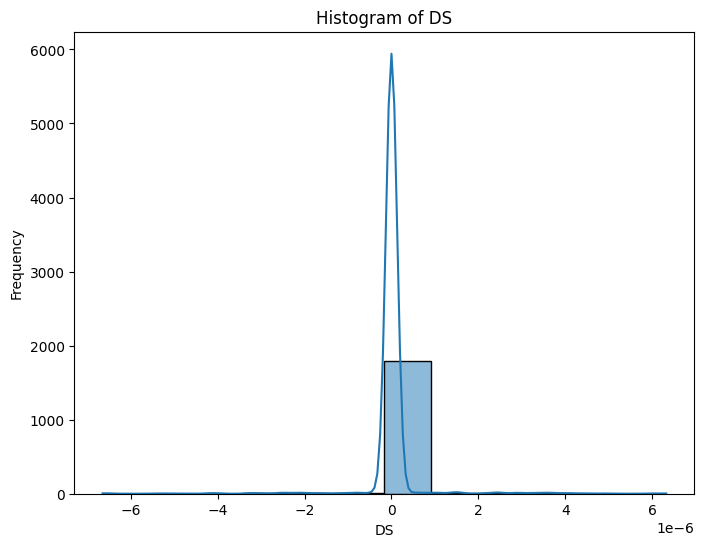

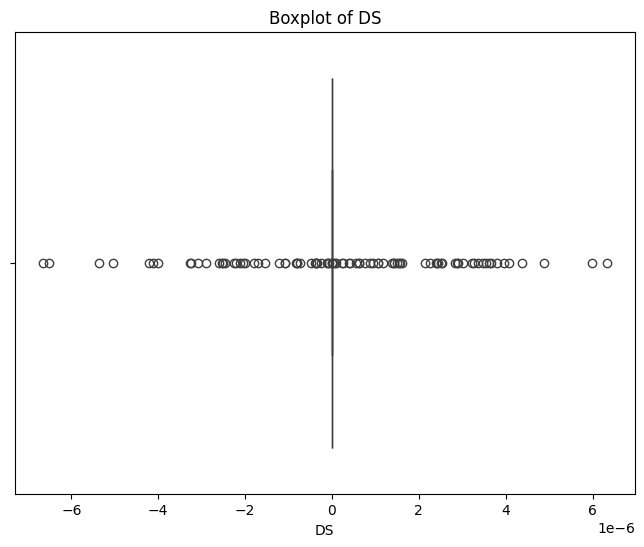

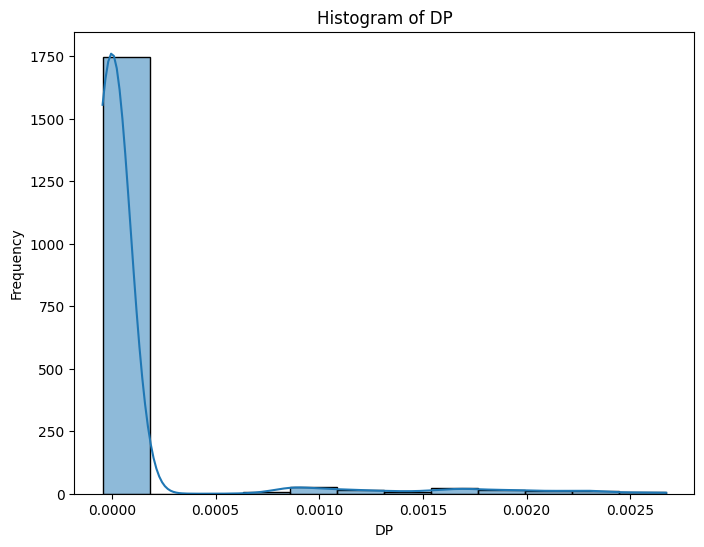

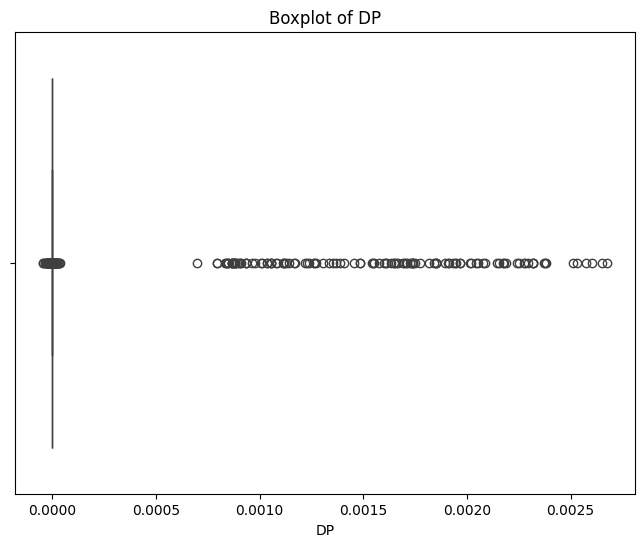

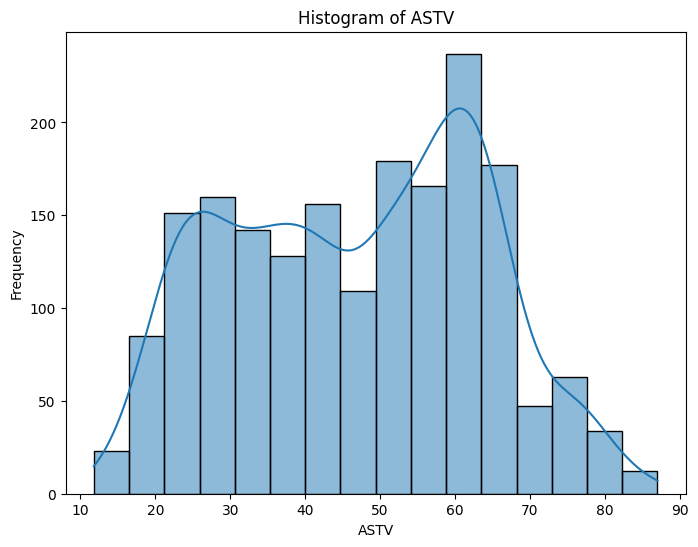

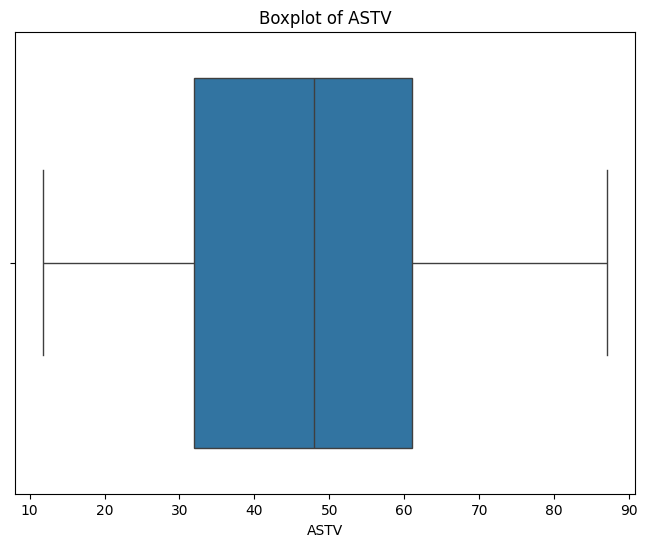

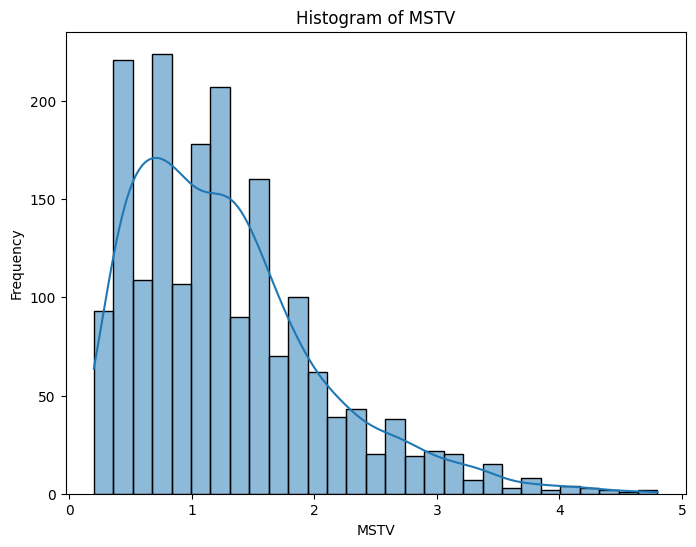

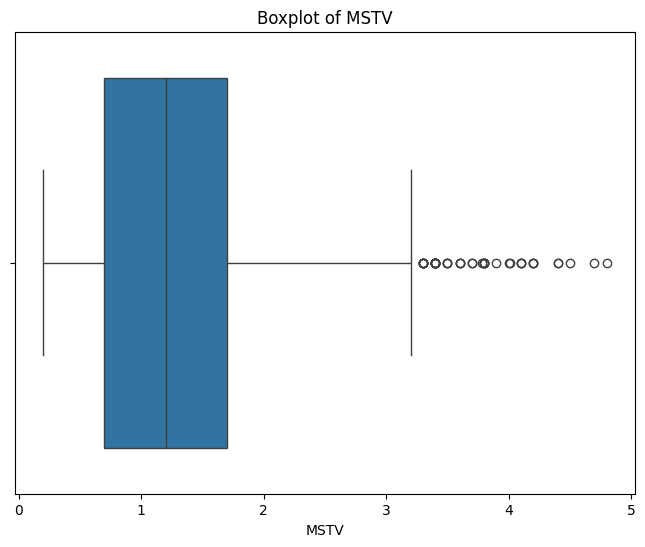

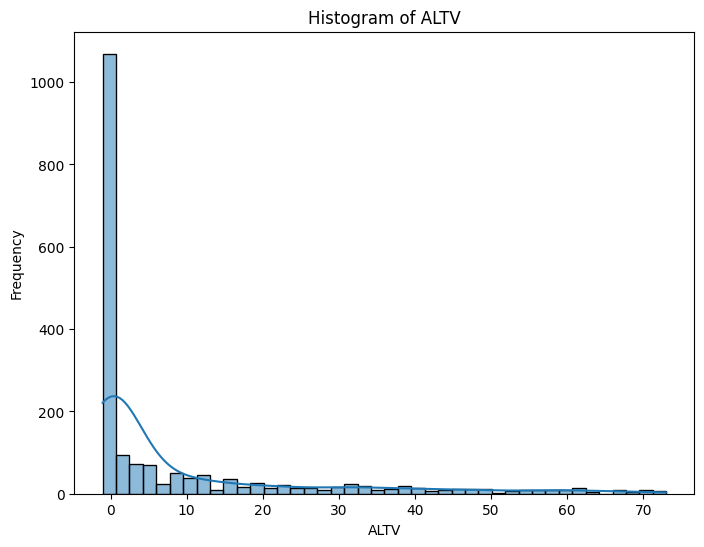

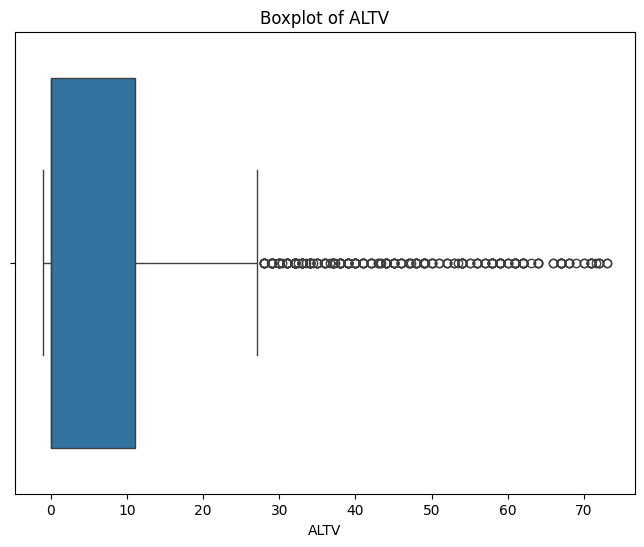

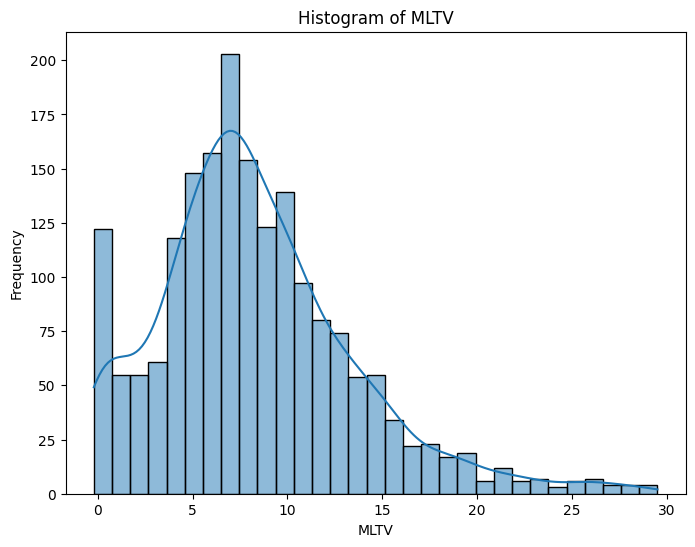

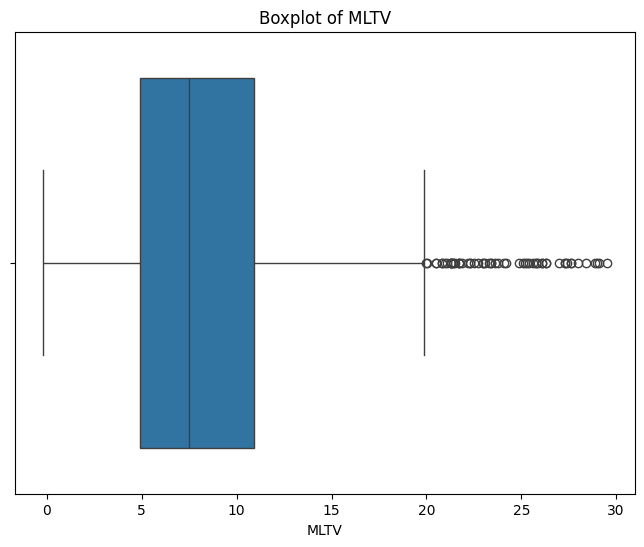

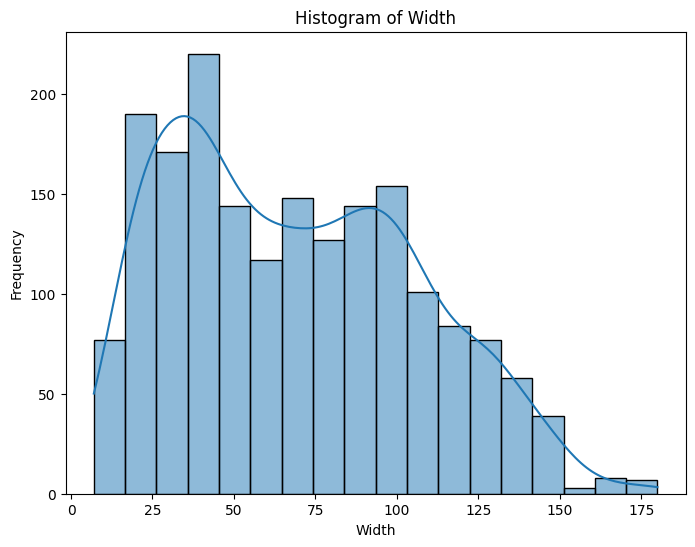

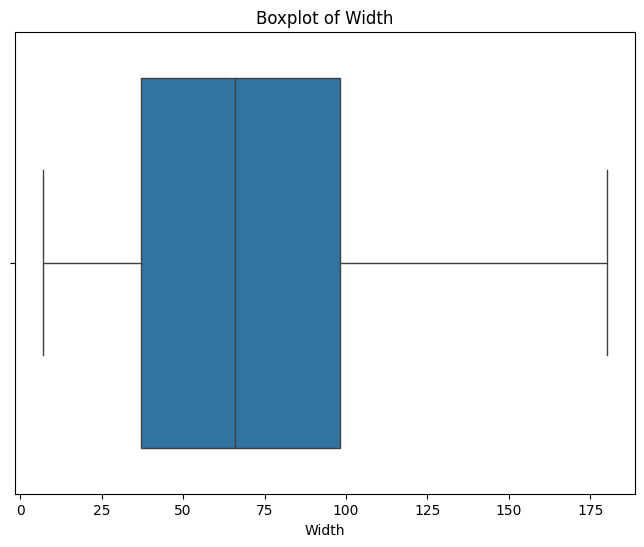

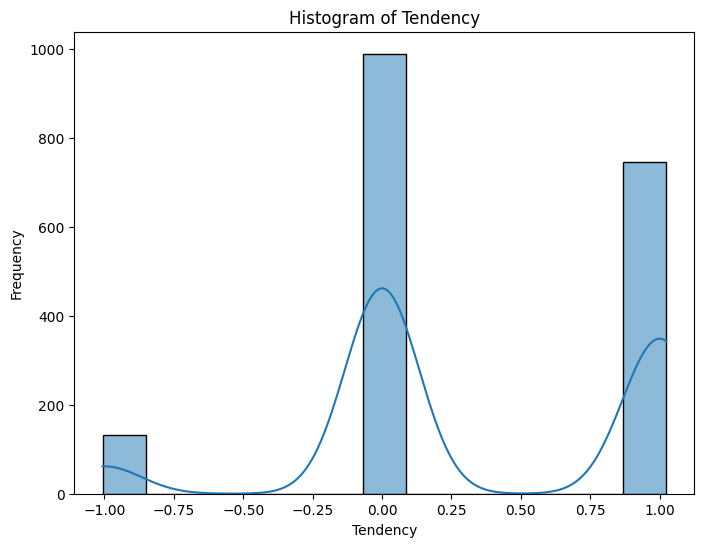

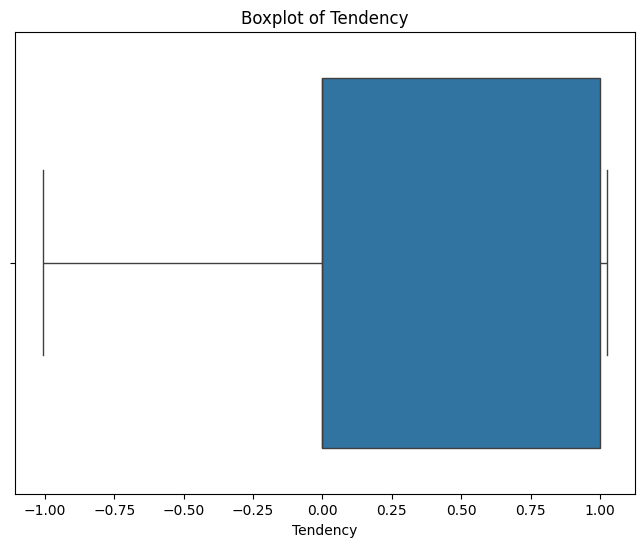

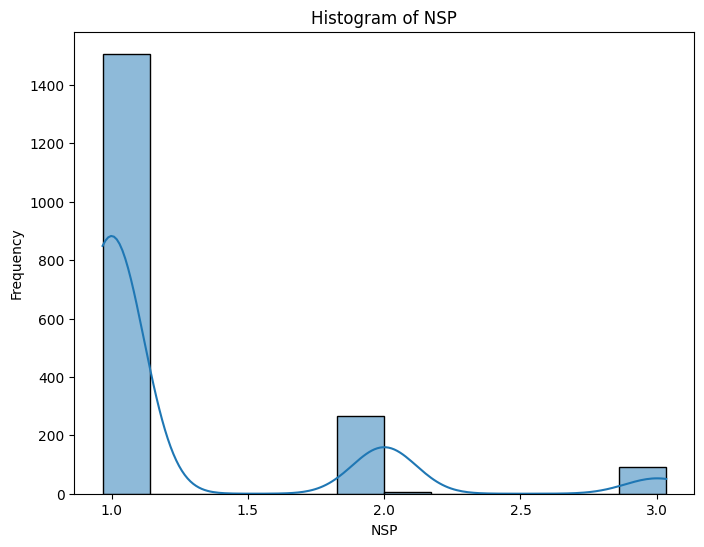

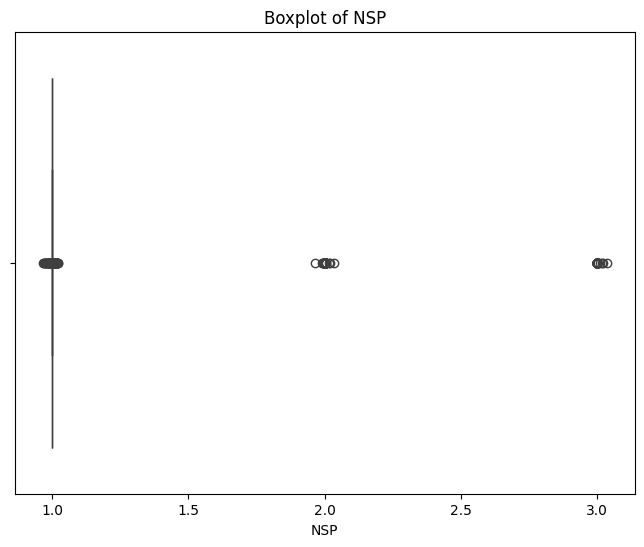

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histograms or boxplots for numerical variables
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


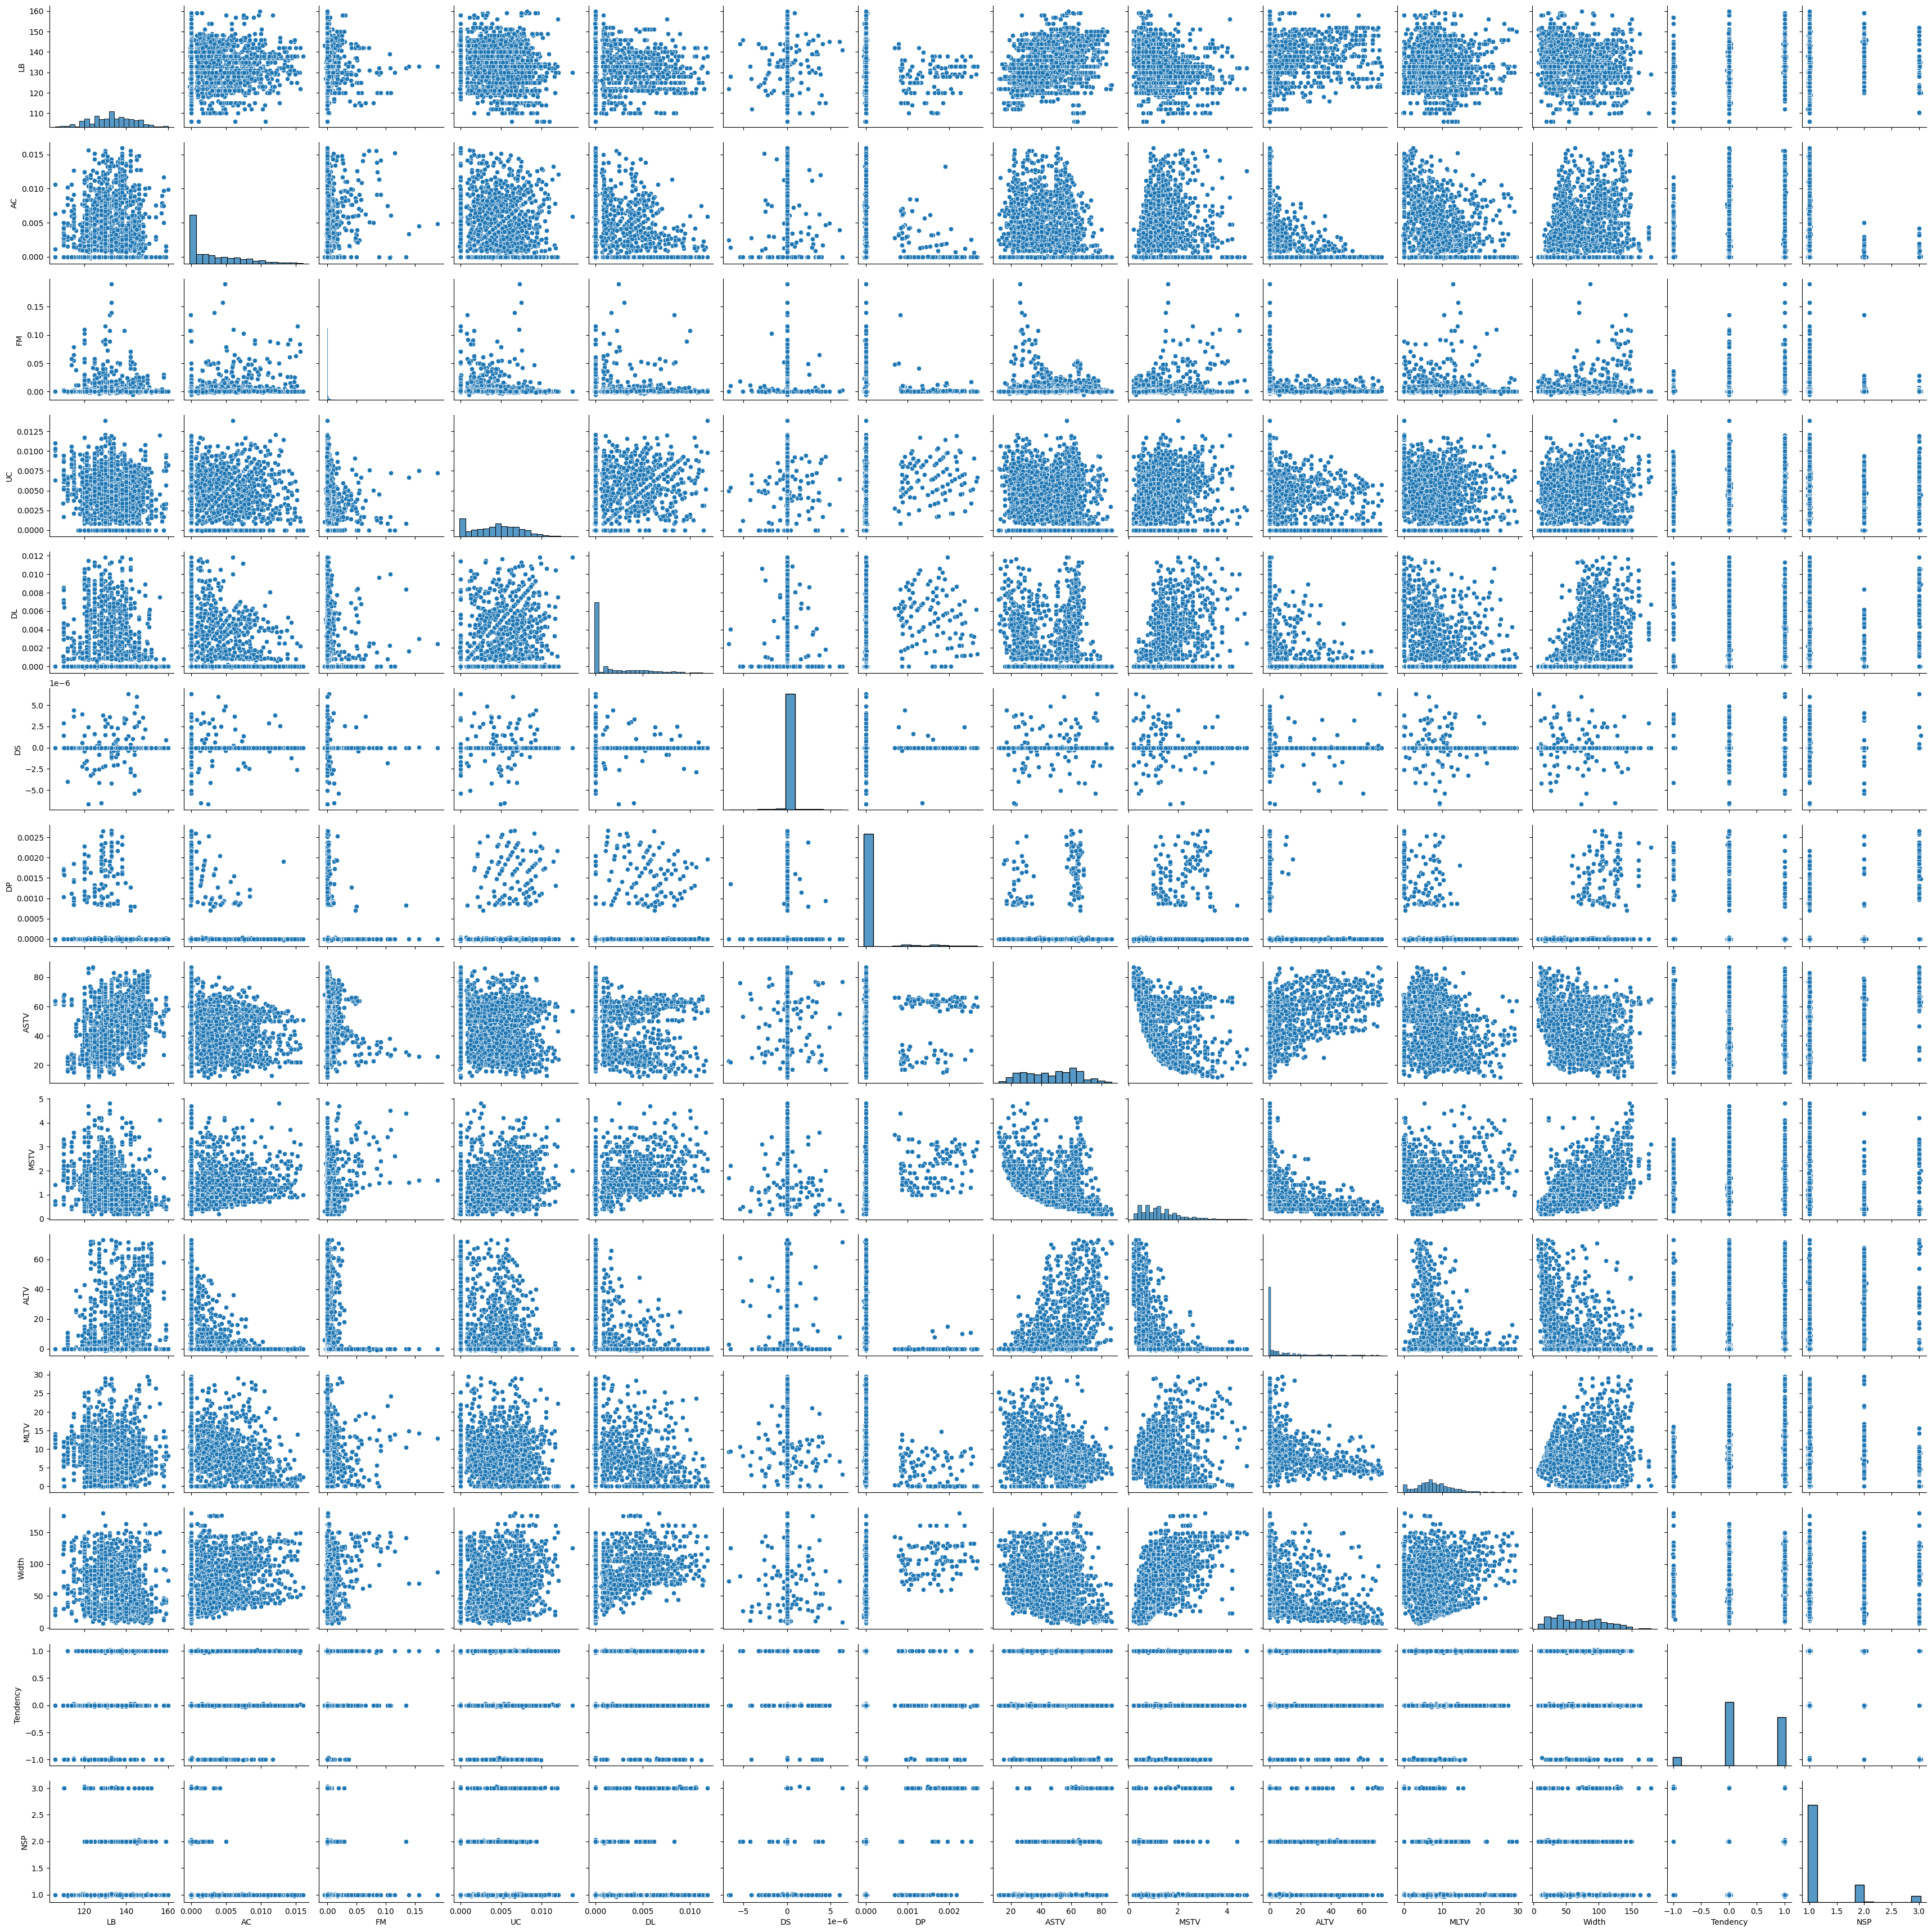

In [11]:
# Scatter plots or correlation heatmaps for exploring relationships
# Scatter plots for numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

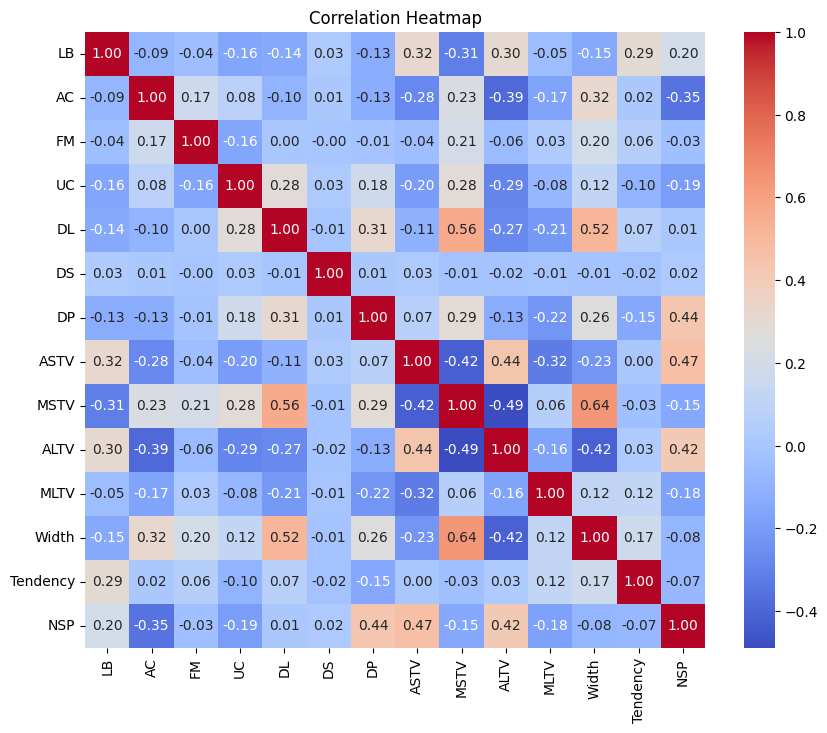

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

All the variables are lightly correlated there is no strong correlation.

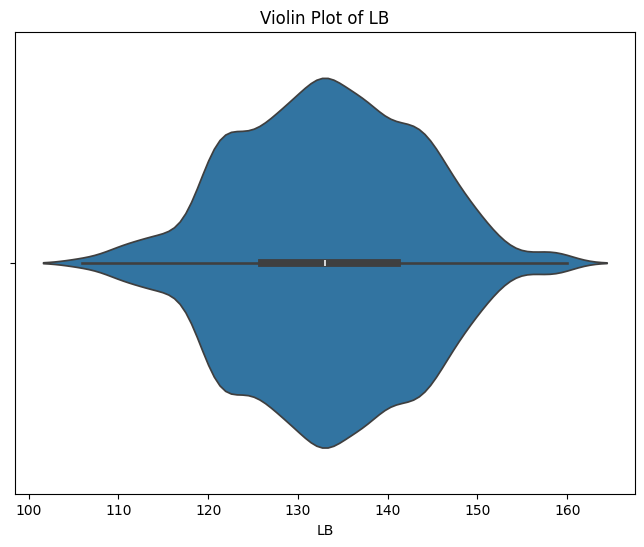

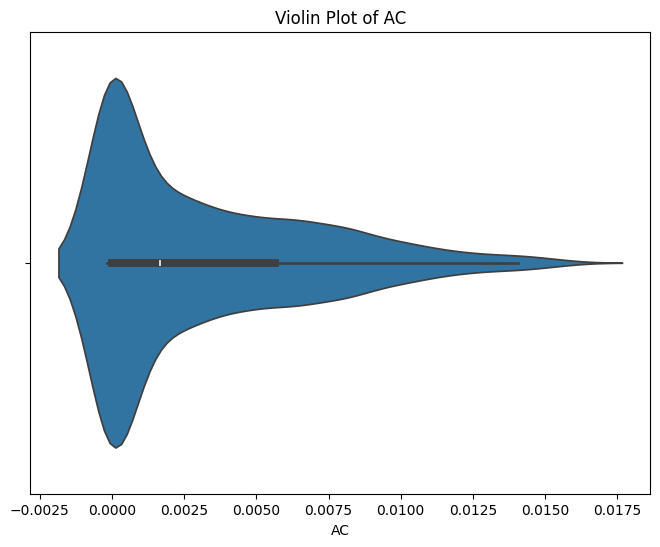

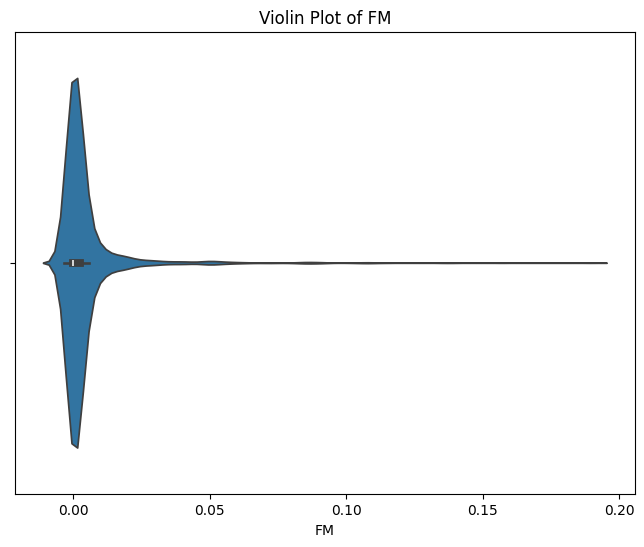

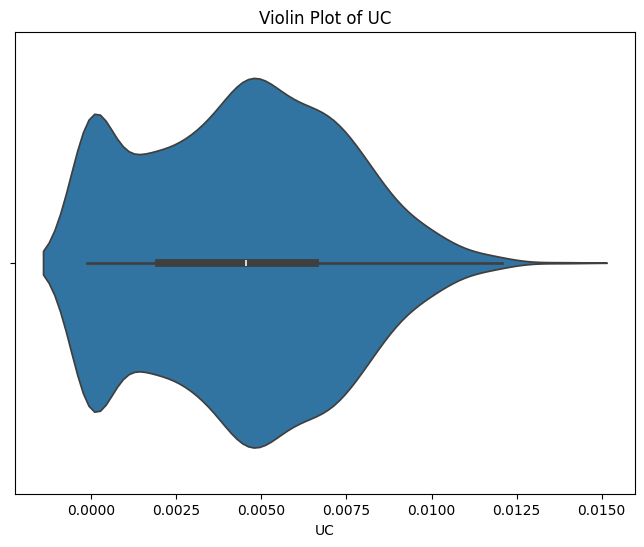

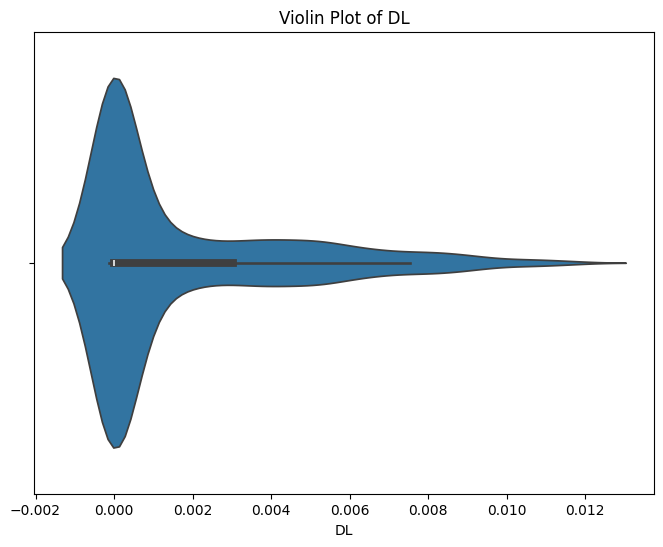

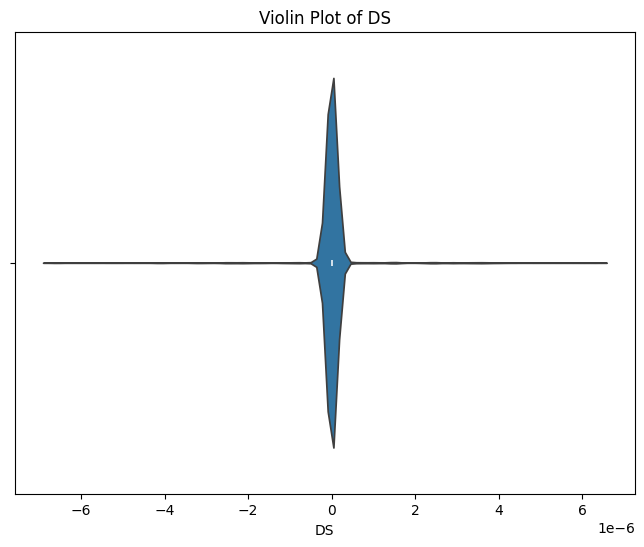

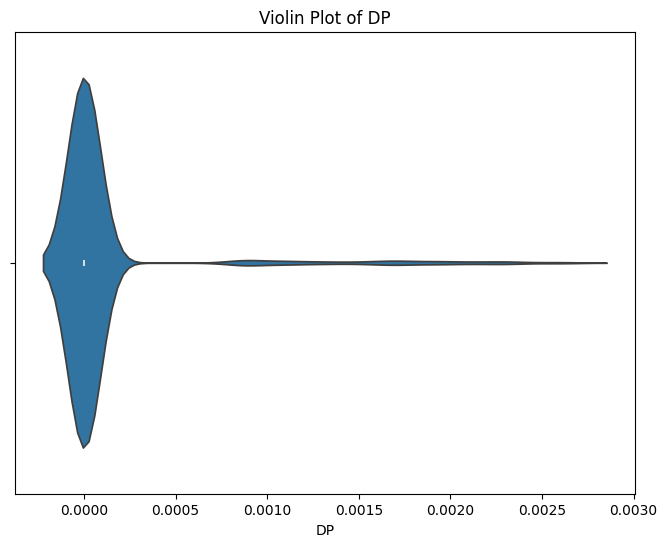

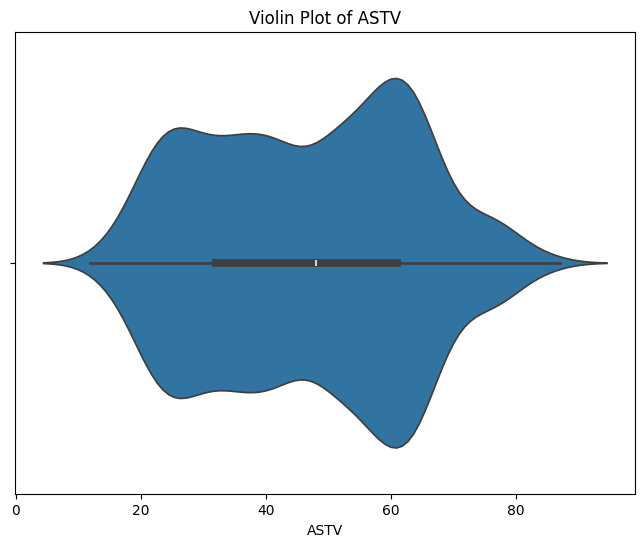

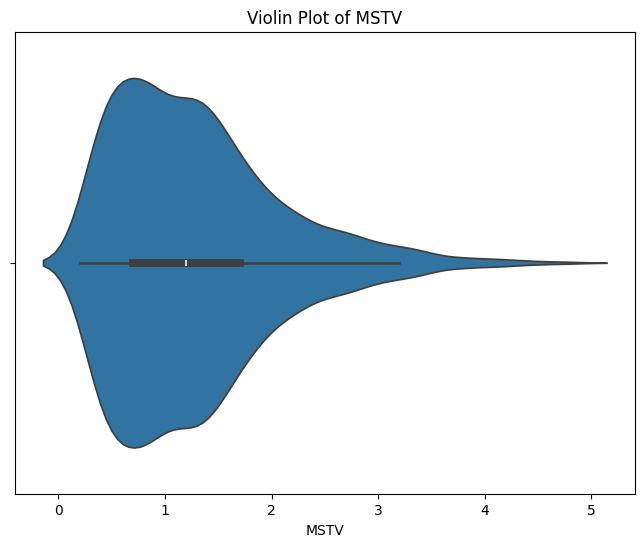

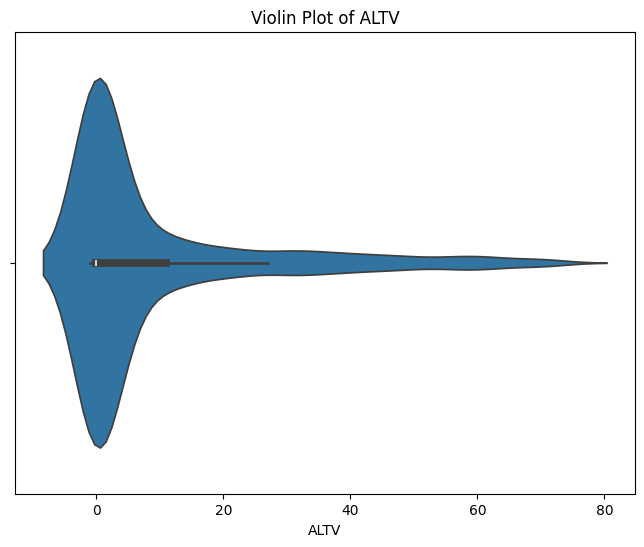

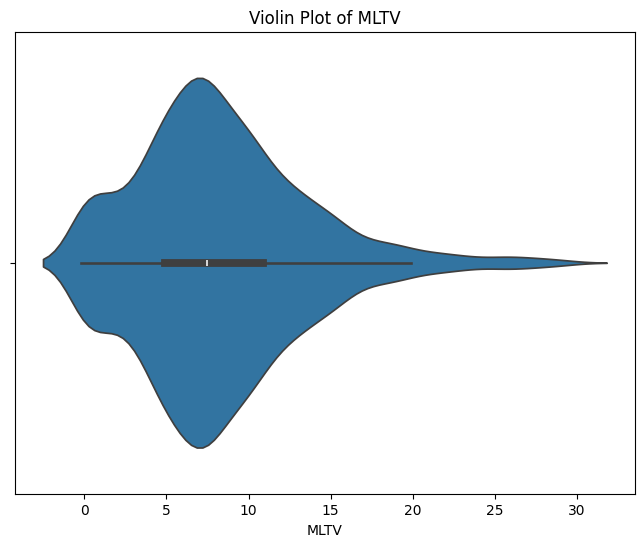

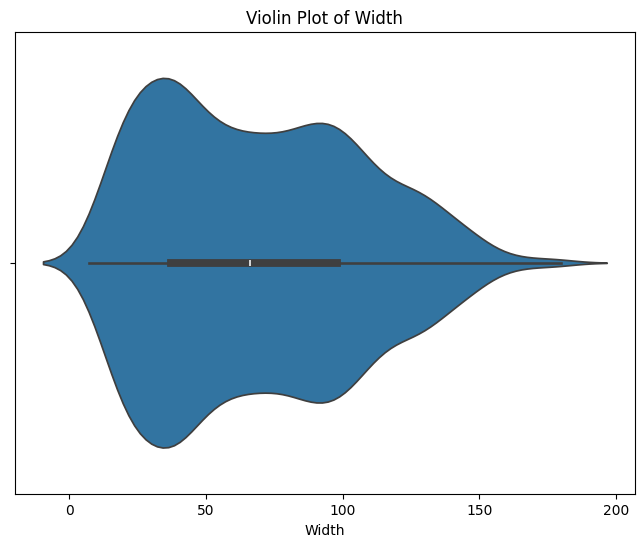

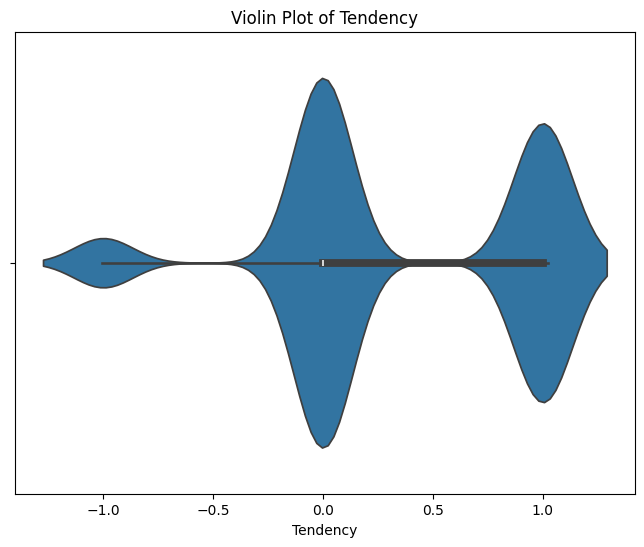

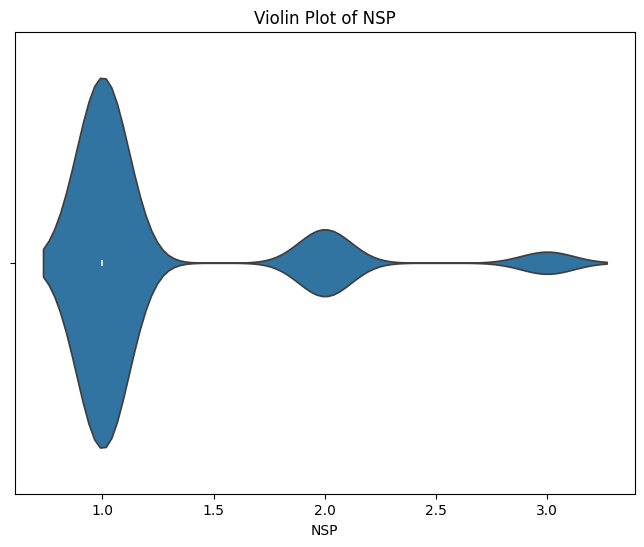

In [13]:
# Advanced visualization techniques like violin plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.show()

Histograms and boxplots for numerical variables to visualize their distributions and identify outliers.

Bar charts and pie charts for categorical variables to display the frequency of categories.

Scatter plots and correlation heatmap to explore relationships between numerical variables and identify correlations.

BY the scatter plot and heat map we can conculde that there is no strong correlation between the  variables .

Advanced visualization techniques like pair plots and violin plots for deeper insights into the data distribution and relationships between variables.